# Spaceship Titanic Machine Learning

### Import Dependencies

In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import re
import dataframe_image as dfi

In [2]:
# sklearn dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.ensemble import EasyEnsembleClassifier

In [3]:
# import dependencies from tensorflow
import tensorflow as tf

import os
from tensorflow.keras.callbacks import ModelCheckpoint

### Read in train.csv

In [4]:
# import training and testing csv files from Data folder
training_df = pd.read_csv("./Data/train.csv")
training_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


#### What is the shape of the training_df?

In [5]:
# what is the shape of training_df
training_df.shape

(8693, 14)

#### What are the dtypes?

In [6]:
# examine missing values and dtypes using info()
training_df.info()

# note there are missing values for almost every column except the target "Transported" and PassengerId

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Data Dictionary: 
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.<br>
source: https://medium.com/mlearning-ai/spaceship-titanic-an-alternative-to-the-plain-old-titanic-dataset-aa98924c606c 

#### What are the value counts for the Target (Transported)?
Is this a balanced or imbalanced problem? Balanced

In [7]:
# Examine the target variable "Transported"
Target = training_df["Transported"].value_counts()
Target

True     4378
False    4315
Name: Transported, dtype: int64

<AxesSubplot:>

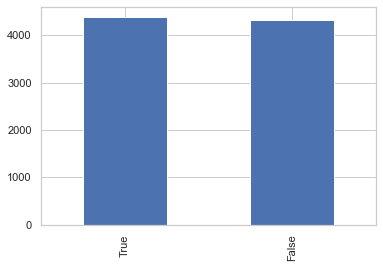

In [8]:
# visualize the value count of the Target
Target.plot(kind='bar')

#### What values are missing?

<AxesSubplot:>

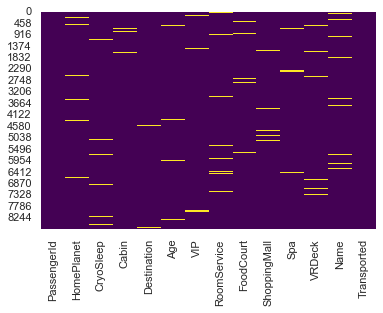

In [9]:
# visualize the missing values using seaborn heatmap
sns.heatmap(training_df.isnull(), cbar=False, cmap='viridis')

In [10]:
# get a count of missing values for each col in training_df
# use training_df[column].isnull().sum() within list comprehension
# list comprehension template is: [expression, for col in columns, where conditional is true]
col_with_missing_values = [print(col, training_df[col].isnull().sum()) for col in training_df.columns if training_df[col].isnull().sum() > 0]


HomePlanet 201
CryoSleep 217
Cabin 199
Destination 182
Age 179
VIP 203
RoomService 181
FoodCourt 183
ShoppingMall 208
Spa 183
VRDeck 188
Name 200


### Strategy for missing values:
* Keep just last name

* Impute VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck with 0

* Impute HomePlanet with 'most_frequent'  - Earth
* Impute CryoSleep with 'most_frequent' - False
* Impute Destination with 'most_frequent' - TRAPPIST-1e

* Impute Age with 'most_frequent' - 27





### Keep just last name

In [11]:
# keep just last name
training_df[["First_Name", "Last_Name"]] = training_df["Name"].str.split(" ", expand=True)
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  First_Name    8493 non-null   object 
 15  Last_Name     8493 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [12]:
# drop Name and First_Name
training_df.drop(columns=['Name', 'First_Name'], inplace=True)

In [13]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Transported   8693 non-null   bool   
 13  Last_Name     8493 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Impute VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck with 0

In [14]:
training_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [15]:
# Use fillna method and a dictionary of fill values to impute VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck with a 0
values = {"VIP": False , "RoomService": 0, "FoodCourt": 0, "ShoppingMall": 0, "Spa": 0, "VRDeck": 0}
training_df.fillna(value=values, inplace=True)


In [16]:
# get a count of missing values for each col in training_df
# use training_df[column].isnull().sum() within list comprehension
# list comprehension template is: [expression, for col in columns, where conditional is true]
col_with_missing_values = [print(col, training_df[col].isnull().sum()) for col in training_df.columns if training_df[col].isnull().sum() > 0]


HomePlanet 201
CryoSleep 217
Cabin 199
Destination 182
Age 179
Last_Name 200


In [17]:
# drop missing Last_Names (for now)
training_df.dropna(subset=['Last_Name'], inplace=True)

In [18]:
# check to see if missing Last Names were dropped
# get a count of missing values for each col in training_df
# use training_df[column].isnull().sum() within list comprehension
# list comprehension template is: [expression, for col in columns, where conditional is true]
col_with_missing_values = [print(col, training_df[col].isnull().sum()) for col in training_df.columns if training_df[col].isnull().sum() > 0]


HomePlanet 194
CryoSleep 207
Cabin 197
Destination 178
Age 176


### Impute HomePlanet with 'most_frequent'

In [19]:
# what is the most frequent value for HomePlanet
training_df['HomePlanet'].value_counts()

Earth     4496
Europa    2085
Mars      1718
Name: HomePlanet, dtype: int64

In [20]:
# fillna with Earth
training_df['HomePlanet'].fillna('Earth', inplace=True)

### Impute CryoSleep with 'most_frequent'

In [21]:
# find most common value for CryoSleep
CryoSleep = training_df['CryoSleep'].value_counts()
CryoSleep

False    5311
True     2975
Name: CryoSleep, dtype: int64

In [22]:
# Impute Missing Values for CryoSleep to False
training_df['CryoSleep'].fillna(False, inplace=True)

### Impute Destination with 'most_frequent'

In [23]:
# find most common value for Destination
Destination = training_df['Destination'].value_counts()
Destination

TRAPPIST-1e      5779
55 Cancri e      1757
PSO J318.5-22     779
Name: Destination, dtype: int64

In [24]:
# Impute Missing Values for Destination to TRAPPIST-1e
training_df['Destination'].fillna('TRAPPIST-1e', inplace=True)

### Impute Age with 'median age'

In [25]:
# find median value for Age
Age = training_df['Age'].describe()
Age

count    8317.000000
mean       28.846339
std        14.463475
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [26]:
# Impute Missing Values for Age to 27
training_df['Age'].fillna(27, inplace=True)

In [27]:
# get a count of missing values for each col in training_df
# use training_df[column].isnull().sum() within list comprehension
# list comprehension template is: [expression, for col in columns, where conditional is true]
col_with_missing_values = [print(col, training_df[col].isnull().sum()) for col in training_df.columns if training_df[col].isnull().sum() > 0]

Cabin 197


<AxesSubplot:>

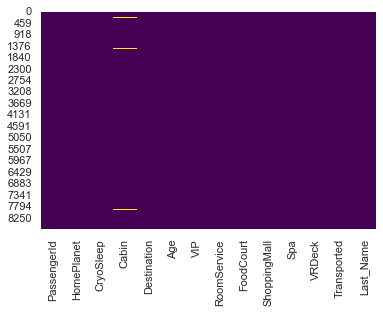

In [28]:
# visualize the missing values using seaborn heatmap
sns.heatmap(training_df.isnull(), cbar=False, cmap='viridis')

In [29]:
# as an inital data cleaning measure I will drop all rows with missing values to determine how much data would be lost
clean_training_df = training_df.dropna(how='any')
clean_training_df.info()

# initally the loss was going to be 2,000 rows
# using imputing the loss is 8693 - 8296 = 397 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8296 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8296 non-null   object 
 1   HomePlanet    8296 non-null   object 
 2   CryoSleep     8296 non-null   bool   
 3   Cabin         8296 non-null   object 
 4   Destination   8296 non-null   object 
 5   Age           8296 non-null   float64
 6   VIP           8296 non-null   bool   
 7   RoomService   8296 non-null   float64
 8   FoodCourt     8296 non-null   float64
 9   ShoppingMall  8296 non-null   float64
 10  Spa           8296 non-null   float64
 11  VRDeck        8296 non-null   float64
 12  Transported   8296 non-null   bool   
 13  Last_Name     8296 non-null   object 
dtypes: bool(3), float64(6), object(5)
memory usage: 802.1+ KB


### Breakout columns that contain mulitple "fields" to include:
* Cabin
* PassengerId


##### Cabin

In [30]:
# Extract GroupId and GroupCount from PassengerId using str.split()
# PassengerId - A unique Id for each passenger. 
# Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. 
# People in a group are often family members, but not always.
extract_training_df = clean_training_df.copy()
extract_training_df[["GroupId", "GroupCount"]] = extract_training_df["PassengerId"].str.split("_", expand=True)
extract_training_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Last_Name,GroupId,GroupCount
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Ofracculy,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Vines,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Susent,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Susent,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Santantines,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,Noxnuther,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,Mondalley,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,Connon,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,Hontichre,9280,01


In [31]:
# reorder columns to put PassengerId, GroupId, and GroupCount together
# extract_training_df.columns
columns = ['PassengerId', 'GroupId', 'GroupCount', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Last_Name', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported']
extract_training_df = extract_training_df[columns]
extract_training_df

,PassengerId,GroupId,GroupCount,HomePlanet,CryoSleep,Cabin,Destination,Last_Name,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,0001,01,Europa,False,B/0/P,TRAPPIST-1e,Ofracculy,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,0002,01,Earth,False,F/0/S,TRAPPIST-1e,Vines,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,0003,01,Europa,False,A/0/S,TRAPPIST-1e,Susent,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,0003,02,Europa,False,A/0/S,TRAPPIST-1e,Susent,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,0004,01,Earth,False,F/1/S,TRAPPIST-1e,Santantines,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,9276,01,Europa,False,A/98/P,55 Cancri e,Noxnuther,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,9278,01,Earth,True,G/1499/S,PSO J318.5-22,Mondalley,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,9279,01,Earth,False,G/1500/S,TRAPPIST-1e,Connon,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,9280,01,Europa,False,E/608/S,55 Cancri e,Hontichre,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [32]:
GroupCount = extract_training_df["GroupCount"].value_counts()
GroupCount

01    5948
02    1339
03     536
04     219
05     126
06      74
07      42
08      12
Name: GroupCount, dtype: int64

In [33]:
# # Extract deck cabin number and side from Cabin using str.split()
# Cabin - The cabin number where the passenger is staying. 
# Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
# Check values for cabin

# make a copy 
extract_training_df_copy = extract_training_df.copy()
extract_training_df_copy[["Deck", "Cabin_Number", "Side"]] = extract_training_df_copy["Cabin"].str.split("/", expand=True)
extract_training_df_copy

,PassengerId,GroupId,GroupCount,HomePlanet,CryoSleep,Cabin,Destination,Last_Name,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_Number,Side
0,0001_01,0001,01,Europa,False,B/0/P,TRAPPIST-1e,Ofracculy,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,0002,01,Earth,False,F/0/S,TRAPPIST-1e,Vines,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,0003,01,Europa,False,A/0/S,TRAPPIST-1e,Susent,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,0003,02,Europa,False,A/0/S,TRAPPIST-1e,Susent,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,0004,01,Earth,False,F/1/S,TRAPPIST-1e,Santantines,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,9276,01,Europa,False,A/98/P,55 Cancri e,Noxnuther,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,9278_01,9278,01,Earth,True,G/1499/S,PSO J318.5-22,Mondalley,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,9279_01,9279,01,Earth,False,G/1500/S,TRAPPIST-1e,Connon,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,9280_01,9280,01,Europa,False,E/608/S,55 Cancri e,Hontichre,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [34]:
# reorder columns to put Cabin, Deck, Cabin_Number, Side together
# extract_training_df.columns
columns = ['PassengerId', 'GroupId', 'GroupCount', 'HomePlanet', 'CryoSleep', 'Cabin', 'Deck', 'Cabin_Number', 'Side', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported']
extract_training_df = extract_training_df_copy[columns]
extract_training_df

,PassengerId,GroupId,GroupCount,HomePlanet,CryoSleep,Cabin,Deck,Cabin_Number,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,0001,01,Europa,False,B/0/P,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,0002,01,Earth,False,F/0/S,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,0003,01,Europa,False,A/0/S,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,0003,02,Europa,False,A/0/S,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,0004,01,Earth,False,F/1/S,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,9276,01,Europa,False,A/98/P,A,98,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,9278,01,Earth,True,G/1499/S,G,1499,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,9279,01,Earth,False,G/1500/S,G,1500,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,9280,01,Europa,False,E/608/S,E,608,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [35]:
# Side counts
Side = extract_training_df['Side'].value_counts()
Side

S    4184
P    4112
Name: Side, dtype: int64

In [36]:
# deck counts
Deck = extract_training_df['Deck'].value_counts()
Deck

F    2721
G    2501
E     857
B     763
C     733
D     468
A     249
T       4
Name: Deck, dtype: int64

In [37]:
# how many unique cabins were assigned?
Cabins_Assigned = len(pd.unique(extract_training_df['Cabin_Number']))
Cabins_Assigned

1812

<AxesSubplot:>

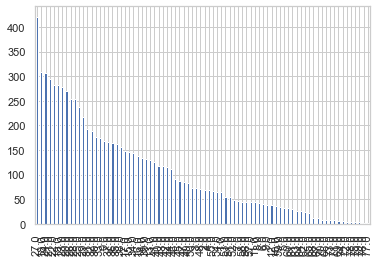

In [38]:
Age = extract_training_df['Age']
Age.value_counts().plot(kind='bar')


In [39]:
# first examine the distribution of age
Age.describe()

count    8296.000000
mean       28.797372
std        14.314088
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

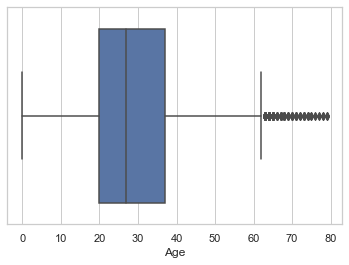

In [40]:
# visualize the distribution of age in a box plot
ax = sns.boxplot(x=Age)

<AxesSubplot:>

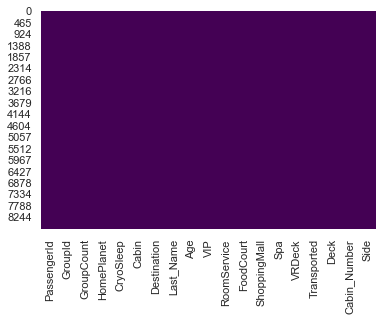

In [41]:
# visualize the missing values using seaborn heatmap
sns.heatmap(extract_training_df_copy.isnull(), cbar=False, cmap='viridis')

In [42]:
# drop original columns that have been split into subsets (i.e. Cabin)
clean_training_df = extract_training_df.copy()
clean_training_df.drop(columns=['PassengerId', 'Cabin'], inplace=True)
clean_training_df

,GroupId,GroupCount,HomePlanet,CryoSleep,Deck,Cabin_Number,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001,01,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002,01,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003,01,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003,02,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004,01,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,01,Europa,False,A,98,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278,01,Earth,True,G,1499,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279,01,Earth,False,G,1500,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280,01,Europa,False,E,608,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


#### Convert Columns from Booleans into Integers with astypes()

In [43]:
# what are our boolean value columns
columns_boolean = clean_training_df.select_dtypes(include='bool').columns
columns_boolean

Index(['CryoSleep', 'VIP', 'Transported'], dtype='object')

In [44]:
# convert boolean to numeric
for col in columns_boolean:
    clean_training_df[col] = clean_training_df[col].astype(int)

In [45]:
# check again for what are our boolean value columns
columns_boolean = clean_training_df.select_dtypes(include='bool').columns
columns_boolean

Index([], dtype='object')

In [46]:
# confirm all columns are object or numeric (for use in pd.get_dummies)
clean_training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8296 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GroupId       8296 non-null   object 
 1   GroupCount    8296 non-null   object 
 2   HomePlanet    8296 non-null   object 
 3   CryoSleep     8296 non-null   int32  
 4   Deck          8296 non-null   object 
 5   Cabin_Number  8296 non-null   object 
 6   Side          8296 non-null   object 
 7   Destination   8296 non-null   object 
 8   Age           8296 non-null   float64
 9   VIP           8296 non-null   int32  
 10  RoomService   8296 non-null   float64
 11  FoodCourt     8296 non-null   float64
 12  ShoppingMall  8296 non-null   float64
 13  Spa           8296 non-null   float64
 14  VRDeck        8296 non-null   float64
 15  Transported   8296 non-null   int32  
dtypes: float64(6), int32(3), object(7)
memory usage: 1004.6+ KB


In [47]:
# convert Cabin_Number to an int
clean_training_df['Cabin_Number'] = clean_training_df['Cabin_Number'].astype(int)

In [48]:
# check again for dtype for Cabin_Number
clean_training_df['Cabin_Number'].dtypes

dtype('int32')

In [49]:
# convert GroupId to int
clean_training_df['GroupId'] = clean_training_df['GroupId'].astype(int)

In [50]:
# check again for dtype for GroupId
clean_training_df['GroupId'].dtypes

dtype('int32')

In [51]:
# convert GroupId to int
clean_training_df['GroupCount'] = clean_training_df['GroupCount'].astype(int)

In [52]:
# check again for dtype for GroupId
clean_training_df['GroupCount'].dtypes

dtype('int32')

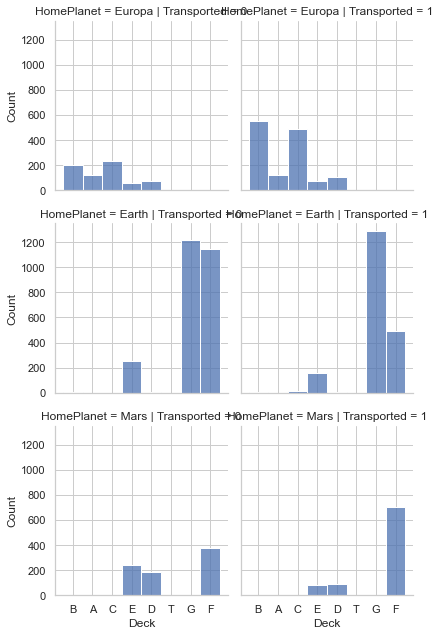

In [53]:
# view a histogram for all data
g = sns.FacetGrid(clean_training_df, col="Transported",  row="HomePlanet")
g.map_dataframe(sns.histplot, x="Deck")

### Save Clean_training_df as csv

In [54]:
# save clean_training_df as csv file
clean_training_df.to_csv('./Data/clean_training.csv', index=False)

### Preprocessing

In [55]:
# examine the shape of clean_training_df
clean_training_df.shape

(8296, 16)

### Split data into feature matrix (X) and target (y)

In [56]:
# Create feature matrix
X = clean_training_df.drop(columns='Transported')
X.shape

(8296, 15)

In [57]:
# Create the target
y = clean_training_df['Transported']
y.shape

(8296,)

In [58]:
# note the balance/imbalance of the target
y_value_counts = y.value_counts()
y_value_counts

# this is a balanced clasification problem

1    4177
0    4119
Name: Transported, dtype: int64

In [59]:
# what are our categorical value columns
columns_obj = X.select_dtypes(include='object').columns
print(f"There are {len(columns_obj)} columns with a dtype of 'object'")

There are 4 columns with a dtype of 'object'


In [60]:
# view the 6 columns:
columns_obj

Index(['HomePlanet', 'Deck', 'Side', 'Destination'], dtype='object')

In [61]:
# examine all the columns and each columns value_counts
for column in X[columns_obj]:
    print(column, "\n", X[column].value_counts())
    print("-----------------------------------")

HomePlanet 
 Earth     4591
Europa    2024
Mars      1681
Name: HomePlanet, dtype: int64
-----------------------------------
Deck 
 F    2721
G    2501
E     857
B     763
C     733
D     468
A     249
T       4
Name: Deck, dtype: int64
-----------------------------------
Side 
 S    4184
P    4112
Name: Side, dtype: int64
-----------------------------------
Destination 
 TRAPPIST-1e      5828
55 Cancri e      1707
PSO J318.5-22     761
Name: Destination, dtype: int64
-----------------------------------


In [62]:
# these columns will be converted to numeric values using Pandas get_dummies
X_encoded = pd.get_dummies(X)
X_encoded.shape

(8296, 27)

In [63]:
# confirm all columns are now numeric
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8296 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GroupId                    8296 non-null   int32  
 1   GroupCount                 8296 non-null   int32  
 2   CryoSleep                  8296 non-null   int32  
 3   Cabin_Number               8296 non-null   int32  
 4   Age                        8296 non-null   float64
 5   VIP                        8296 non-null   int32  
 6   RoomService                8296 non-null   float64
 7   FoodCourt                  8296 non-null   float64
 8   ShoppingMall               8296 non-null   float64
 9   Spa                        8296 non-null   float64
 10  VRDeck                     8296 non-null   float64
 11  HomePlanet_Earth           8296 non-null   uint8  
 12  HomePlanet_Europa          8296 non-null   uint8  
 13  HomePlanet_Mars            8296 non-null   uint8

### StandarScaler: Transform the feature matrix using standard scaler 

In [64]:
# scale X_encoded using StandardScaler
data_scaler = StandardScaler()

In [65]:
# fit and transform our X_encoded
X_encoded_std_scaled = data_scaler.fit_transform(X_encoded)

# examine the first row
X_encoded_std_scaled[:1]

array([[-1.74150681, -0.48930897, -0.73135157, -1.17174594,  0.71281124,
        -0.1530994 , -0.34198895, -0.27955001, -0.30639668, -0.26979244,
        -0.26743082, -1.11316499,  1.76034492, -0.50410259, -0.17590682,
         3.14211239, -0.31131851, -0.2445105 , -0.33941664, -0.69862132,
        -0.65694669, -0.02196344,  1.00871687, -1.00871687, -0.50898737,
        -0.31779766,  0.65074795]])

### Establish a Baseline for model performance using LogisticRegress as a classifier

In [66]:
# from sklearn.model_selection import train_test_split 
# note: y is not scaled but the extension _ss is added to help me remember to use the scaled feature matrix values
X_train, X_test, y_train, y_test = train_test_split(X_encoded_std_scaled, y, random_state = 1)

### Establish a Baseline for model performance using LogisticRegress as a classifier

In [67]:
# Instantiate a Logistic Regression Model
# increased max_iter=1000 due to inability of 'lbfgs' solver to converge
LR_clf_baseline = LogisticRegression(solver='lbfgs', random_state=1, max_iter=100)
LR_clf_baseline

LogisticRegression(random_state=1)

In [68]:
# fit our model with our data (training)
LR_clf_baseline.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [69]:
# create predictions using predict() method
y_pred_baseline = LR_clf_baseline.predict(X_test)
y_pred_baseline

array([1, 1, 1, ..., 1, 0, 1])

In [70]:
# view the data
pd.DataFrame({"Prediction": y_pred_baseline, "Actual": y_test})

,Prediction,Actual
4931,1,1
6456,1,1
8211,1,1
7863,0,0
3921,0,0
...,...,...
5836,1,1
1831,1,1
1777,1,0
8347,0,1


In [71]:
# calculate model accuracy
balanced_accuracy_score(y_test, y_pred_baseline)

0.8010927132301998

In [72]:
# create a confusion matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
print(cm_baseline)

[[790 239]
 [173 872]]


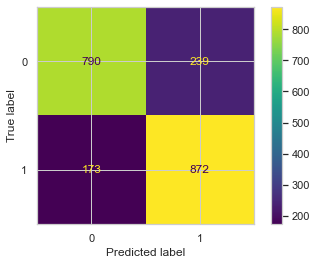

In [73]:
# confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline,display_labels= LR_clf_baseline.classes_)
disp.plot()

# save the image
plt.savefig("./Images/Baseline_confusion_matrix.png")
plt.show()

In [74]:
# view the classification report
# report = classification_report(y_test, y_pred_baseline, output_dict=True)

baseline_report = classification_report(y_test, y_pred_baseline)
print("Baseline")
print(baseline_report)

Baseline
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1029
           1       0.78      0.83      0.81      1045

    accuracy                           0.80      2074
   macro avg       0.80      0.80      0.80      2074
weighted avg       0.80      0.80      0.80      2074



### Balanced Random Forest Classifier


In [75]:
# model fit predict using the BalancedRandomForestClassifier

# model
brf_model = BalancedRandomForestClassifier(n_estimators= 100,random_state=1)

# fit
brf_model = brf_model.fit(X_train, y_train)

# predict
predictions = brf_model.predict(X_test)

In [76]:
# Calculated the balanced accuracy score
print(f"The balanced accuracy score is: {balanced_accuracy_score(y_test, predictions):.3f}")

The balanced accuracy score is: 0.805


In [77]:
# Display the confusion matrix
cm_brf = confusion_matrix(y_test, predictions)
cm_brf

array([[862, 167],
       [237, 808]], dtype=int64)

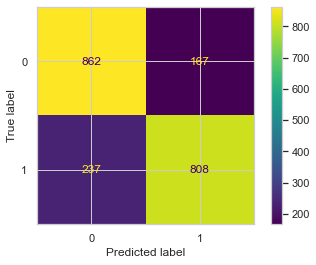

In [78]:
# confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_brf,display_labels= brf_model.classes_)
disp.plot()

# save the image
plt.savefig("./Images/BalancedRandomForestClassifier_confusion_matrix.png")
plt.show()

In [79]:
# Print the classification report
BalancedRandomForestClassifier_report = classification_report(y_test, predictions)
print("BalancedRandomForestClassifier")
print(BalancedRandomForestClassifier_report)

BalancedRandomForestClassifier
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1029
           1       0.83      0.77      0.80      1045

    accuracy                           0.81      2074
   macro avg       0.81      0.81      0.81      2074
weighted avg       0.81      0.81      0.81      2074



In [80]:
# List the features sorted in descending order by feature importance
importance_features = brf_model.feature_importances_

# put this together in a dataframe
# get the column names
cols = X_encoded.columns

# create the dataframe
importance_features_df = pd.DataFrame({'feature': cols, 'importance': importance_features})
importance_features_df

,feature,importance
0,GroupId,0.110888
1,GroupCount,0.025988
2,CryoSleep,0.081451
3,Cabin_Number,0.115255
4,Age,0.097288
5,VIP,0.001546
6,RoomService,0.093728
7,FoodCourt,0.077165
8,ShoppingMall,0.064481
9,Spa,0.093565


In [81]:
# sort in desc order
print("Feature Importance BalancedRandomForestClassifier")
top_ten_importance_features_df = importance_features_df.sort_values('importance', ascending=False)
top_ten_importance_features_df.reset_index(drop=True, inplace=True)
top_ten_importance_features_df

Feature Importance BalancedRandomForestClassifier


,feature,importance
0,Cabin_Number,0.115255
1,GroupId,0.110888
2,Age,0.097288
3,RoomService,0.093728
4,Spa,0.093565
5,VRDeck,0.093468
6,CryoSleep,0.081451
7,FoodCourt,0.077165
8,ShoppingMall,0.064481
9,GroupCount,0.025988


### Easy Ensemble AdaBoost Classifier

In [82]:
# Train the EasyEnsembleClassifier

# model
ee_clf = EasyEnsembleClassifier(n_estimators=100, random_state=1)

# fit/train
ee_clf.fit(X_train, y_train)

# predict
y_pred = ee_clf.predict(X_test)

In [83]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.8020124522809807

In [84]:
# Display the confusion matrix
cm_AdaBoost = confusion_matrix(y_test, y_pred)
cm_AdaBoost

array([[785, 244],
       [166, 879]], dtype=int64)

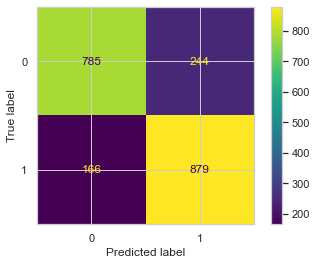

In [85]:
# confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_AdaBoost,display_labels= ee_clf.classes_)
disp.plot()

# save the image
plt.savefig("./Images/EasyEnsembleClassifier_confusion_matrix.png")
plt.show()

In [86]:
# Print the classification report
EasyEnsembleClassifier_classification_report = classification_report(y_test, y_pred)
print("EasyEnsembleClassifier")
print(EasyEnsembleClassifier_classification_report)

EasyEnsembleClassifier
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1029
           1       0.78      0.84      0.81      1045

    accuracy                           0.80      2074
   macro avg       0.80      0.80      0.80      2074
weighted avg       0.80      0.80      0.80      2074



## Neural Network

### Define the model.
### Add first and second hidden layers.
### Add the output layer.

In [87]:
# how many inputs in the input layer
inputs = len(X_train[0])

### Compile the model

In [88]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = inputs
hidden_nodes_layer1 = inputs * 3
hidden_nodes_layer2 = inputs * 2
hidden_nodes_layer3 = inputs * 1

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 81)                2268      
_________________________________________________________________
dense_1 (Dense)              (None, 54)                4428      
_________________________________________________________________
dense_2 (Dense)              (None, 27)                1485      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 28        
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


### Implement Checkpoints
Note: Create a callback that saves the model's weights every 5 epochs.

In [89]:
# Import checkpoint dependencies
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

### Compile the Model

In [90]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [91]:
# Create a callback that saves the model's weights every epoch (set  5)
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

In [92]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=50, callbacks=[cp_callback])

Epoch 1/50
  1/195 [..............................] - ETA: 1:26 - loss: 0.7276 - accuracy: 0.4688
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 21/195 [==>...........................] - ETA: 0s - loss: 0.6907 - accuracy: 0.5580  
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 46/195 [======>.......................] - ETA: 0s - loss: 0.6747 - accuracy: 0.5985
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpo

<AxesSubplot:>

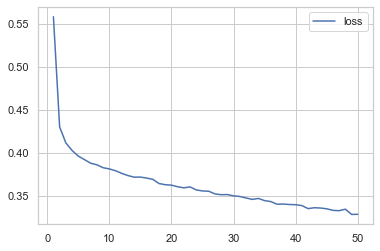

In [97]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

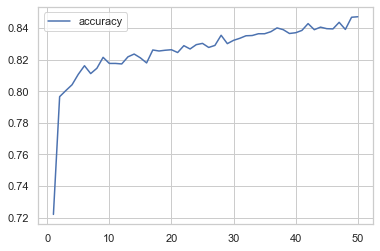

In [98]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [99]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

65/65 - 0s - loss: 0.4043 - accuracy: 0.8149
Loss: 0.40425920486450195, Accuracy: 0.8148505091667175


In [100]:
# Export our model to HDF5 file
nn.save("./Trained_Models/DeepNeuralNetwork.h5")